# Exploring airplane crashes


Acording to [WikiHow](https://www.wikihow.com/Survive-a-Plane-Crash)
> The odds of dying on a commercial airline flight are actually as low as 9 million to 1. That said, a lot can go wrong at 33,000 feet (10,058.4 m) above the ground, and if you’re unlucky enough to be aboard when something does, the decisions you make could mean the difference between life and death. Almost 95% of airplane crashes have survivors, so even if the worst does happen, your odds aren't as bad as you might think.

So let's see...

## Setting up the environment

In [1]:
#importing the libraries and data
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
%matplotlib inline
Data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

## Getting familiar with data

In [2]:
Data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [3]:
obs,feat=Data.shape

In [4]:
obs,feat

(5268, 13)

In [5]:
print(str("Dataset consist of " + str(obs) + " observations (crashes) and " + str(feat) + " features. Features are following:"))

Dataset consist of 5268 observations (crashes) and 13 features. Features are following:


*  **Date** (date the crash had taken place)
* **Time** (time the crash had taken place)
* **Location** 
* **Operator **
* **Flight #** 
* **Route**
* **Type**
* **Registration**
* **cn/In ** - ?
* **Aboard **  - number of people aboard
* **Fatalities ** - lethal outcome
* **Ground** - saved people
* **Summary ** - brief summary of the case

And actually something does not make sense in this data set. Theoretically, Aboard = Fatalities + Ground, but it does not look like this. So I just skipped Ground row for any further analysis.
Now let's look how data looks like and check how many missing values are here.

In [6]:
Data.isnull().sum() #calculating missing values in rows

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

Nice to see, that there are not so many missing values of variables we are most interested in (Date, Operator, Aboard, Fatalities, ...). 
Let's move futher and do some manipulations with data.

## Data manipulation

I want to create a new row with 'Date + Time' format. I replaced all the missing values of Time with 0:00. Then I removed some wrong symbols and fixed broken values. 

In [7]:
Data['Time']

0       17:18
1       06:30
2         NaN
3       18:30
4       10:30
5       01:00
6       15:20
7         NaN
8       01:00
9       23:45
10        NaN
11      23:45
12        NaN
13        NaN
14      05:15
15      08:45
16      07:00
17      07:45
18      21:30
19        NaN
20      10:00
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
        ...  
5238    11:35
5239    10:32
5240    17:00
5241    12:13
5242    06:25
5243    16:40
5244    15:30
5245    15:06
5246    14:00
5247    06:30
5248    22:17
5249    16:05
5250    04:10
5251    10:31
5252    05:40
5253    09:48
5254    14:28
5255    06:48
5256    14:00
5257    12:30
5258    07:00
5259    10:30
5260    15:32
5261    06:00
5262    12:00
5263    06:30
5264      NaN
5265    00:15
5266    08:30
5267      NaN
Name: Time, Length: 5268, dtype: object

In [8]:
Data['Time'].replace(np.nan, '00:00') 

0       17:18
1       06:30
2       00:00
3       18:30
4       10:30
5       01:00
6       15:20
7       00:00
8       01:00
9       23:45
10      00:00
11      23:45
12      00:00
13      00:00
14      05:15
15      08:45
16      07:00
17      07:45
18      21:30
19      00:00
20      10:00
21      00:00
22      00:00
23      00:00
24      00:00
25      00:00
26      00:00
27      00:00
28      00:00
29      00:00
        ...  
5238    11:35
5239    10:32
5240    17:00
5241    12:13
5242    06:25
5243    16:40
5244    15:30
5245    15:06
5246    14:00
5247    06:30
5248    22:17
5249    16:05
5250    04:10
5251    10:31
5252    05:40
5253    09:48
5254    14:28
5255    06:48
5256    14:00
5257    12:30
5258    07:00
5259    10:30
5260    15:32
5261    06:00
5262    12:00
5263    06:30
5264    00:00
5265    00:15
5266    08:30
5267    00:00
Name: Time, Length: 5268, dtype: object

In [9]:
Data['Date']

0       09/17/1908
1       07/12/1912
2       08/06/1913
3       09/09/1913
4       10/17/1913
5       03/05/1915
6       09/03/1915
7       07/28/1916
8       09/24/1916
9       10/01/1916
10      11/21/1916
11      11/28/1916
12      03/04/1917
13      03/30/1917
14      05/14/1917
15      06/14/1917
16      08/21/1917
17      10/20/1917
18      04/07/1918
19      05/10/1918
20      08/11/1918
21      12/16/1918
22      05/25/1919
23      07/19/1919
24      10/02/1919
25      10/14/1919
26      10/20/1919
27      10/30/1919
28      03/10/1920
29      03/30/1920
           ...    
5238    11/13/2008
5239    11/16/2008
5240    11/27/2008
5241    12/03/2008
5242    12/11/2008
5243    12/15/2008
5244    01/04/2009
5245    01/15/2009
5246    02/07/2009
5247    02/07/2009
5248    02/12/2009
5249    02/15/2009
5250    02/20/2009
5251    02/25/2009
5252    03/09/2009
5253    03/12/2009
5254    03/22/2009
5255    03/23/2009
5256    04/01/2009
5257    04/06/2009
5258    04/09/2009
5259    04/1

In [10]:
#cleaning up
Data['Time'] = Data['Time'].replace(np.nan, '00:00') 
Data['Time'] = Data['Time'].str.replace('c: ', '')
Data['Time'] = Data['Time'].str.replace('c:', '')
Data['Time'] = Data['Time'].str.replace('c', '')
Data['Time'] = Data['Time'].str.replace('12\'20', '12:20')
Data['Time'] = Data['Time'].str.replace('18.40', '18:40')
Data['Time'] = Data['Time'].str.replace('0943', '09:43')
Data['Time'] = Data['Time'].str.replace('22\'08', '22:08')
Data['Time'] = Data['Time'].str.replace('114:20', '00:00') #is it 11:20 or 14:20 or smth else? 

Data['Time'] = Data['Date'] + ' ' + Data['Time'] #joining two rows
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
Data['Time'] = Data['Time'].apply(todate) #convert to date type
print('Date ranges from ' + str(Data.Time.min()) + ' to ' + str(Data.Time.max()))

Data.Operator = Data.Operator.str.upper() #just to avoid duplicates like 'British Airlines' and 'BRITISH Airlines'

Date ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


After this manipulations we have a new Time column with *%m/%d/%Y %H:%M* format. We can see that almost 10 year of recent information is missing so we will not see the actual trend.

## Data Visualization
### Total accidents

In [11]:
accser=Data.groupby(Data.Time.dt.year)[['Date']].count()
accser.head()
accser[accser.index==1972]

,Date
Time,
1972,104


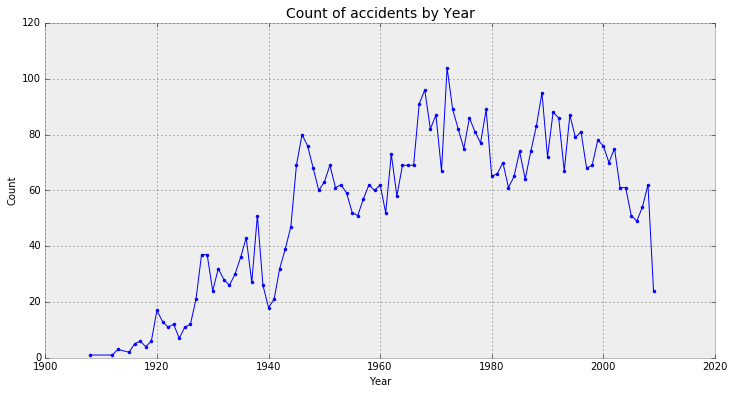

In [12]:
Temp = Data.groupby(Data.Time.dt.year)[['Date']].count() #Temp is going to be temporary data frame 
Temp = Temp.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='blue', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.show()

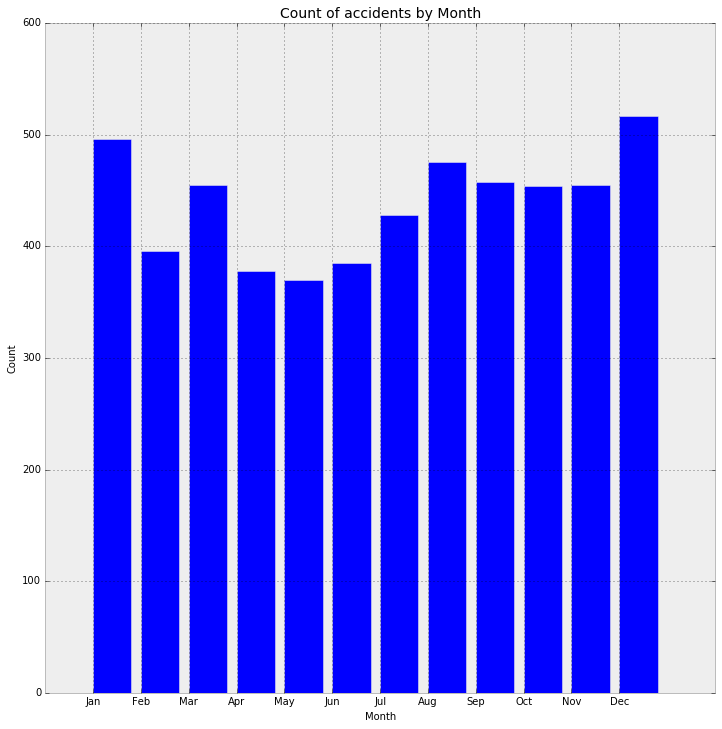

In [13]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec


plt.figure(figsize=(12,12))

plt.bar(Data.groupby(Data.Time.dt.month)[['Date']].count().index, 'Date', data=Data.groupby(Data.Time.dt.month)[['Date']].count())
plt.xticks(Data.groupby(Data.Time.dt.month)[['Date']].count().index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.title('Count of accidents by Month', loc='Center', fontsize=14)



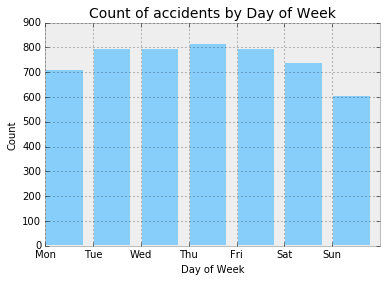

In [14]:
ax = pl.plot()
plt.bar(Data.groupby(Data.Time.dt.weekday)[['Date']].count().index, 'Date', data=Data.groupby(Data.Time.dt.weekday)[['Date']].count(), color='lightskyblue', linewidth=2)
plt.xticks(Data.groupby(Data.Time.dt.weekday)[['Date']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Day of Week', loc='Center', fontsize=14)

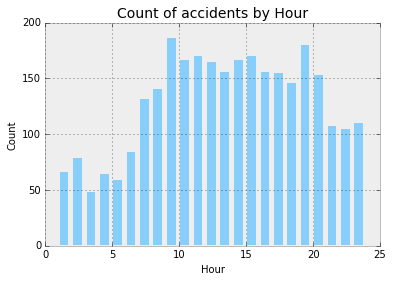

In [15]:
ax = pl.plot()
plt.bar(Data[Data.Time.dt.hour != 0].groupby(Data.Time.dt.hour)[['Date']].count().index, 'Date', data=Data[Data.Time.dt.hour != 0].groupby(Data.Time.dt.hour)[['Date']].count(),color ='lightskyblue', linewidth=2)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Hour', loc='Center', fontsize=14)

plt.show()

### Military vs Passenger flights

In [16]:
Temp = Data.copy()
Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']

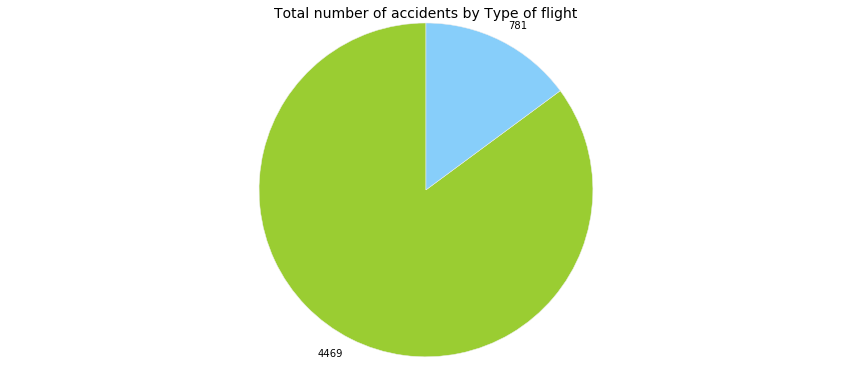

In [17]:
colors = ['yellowgreen', 'lightskyblue']
plt.figure(figsize=(15,6))

plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90)

plt.axis('equal')
plt.title('Total number of accidents by Type of flight', loc='Center', fontsize=14)

In [18]:

Temp2 = Data.copy()

Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')

Temp2['Passenger'] = Temp2.Military == False

Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger']]

Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)



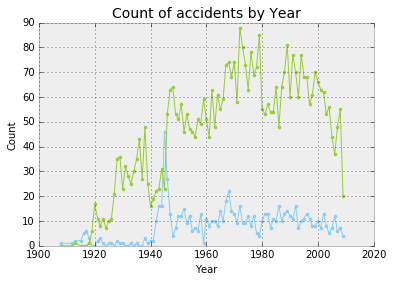

In [19]:
plt.plot(Temp2.index, 'Military', data=Temp2, color='lightskyblue', marker = ".", linewidth=1)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='yellowgreen', marker = ".", linewidth=1)

plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)

plt.show()

### Total number of Fatalities

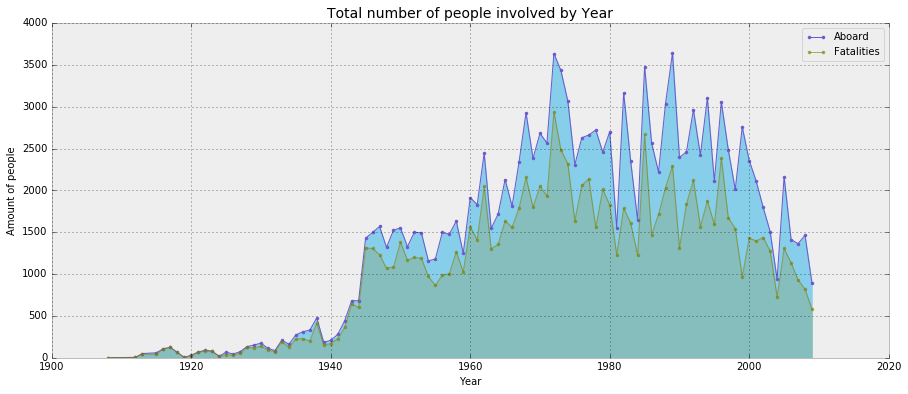

In [20]:
Fatalities = Data.groupby(Data.Time.dt.year).sum()
Fatalities['Proportion'] = Fatalities['Fatalities'] / Fatalities['Aboard']

plt.figure(figsize=(15,6))

plt.fill_between(Fatalities.index, 'Aboard', data=Fatalities, color="skyblue")
plt.plot(Fatalities.index, 'Aboard', data=Fatalities, marker = ".", color="Slateblue", linewidth=1)
plt.fill_between(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", alpha=0.2)
plt.plot(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", marker = ".", alpha=0.6, linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.title('Total number of people involved by Year', loc='Center', fontsize=14)

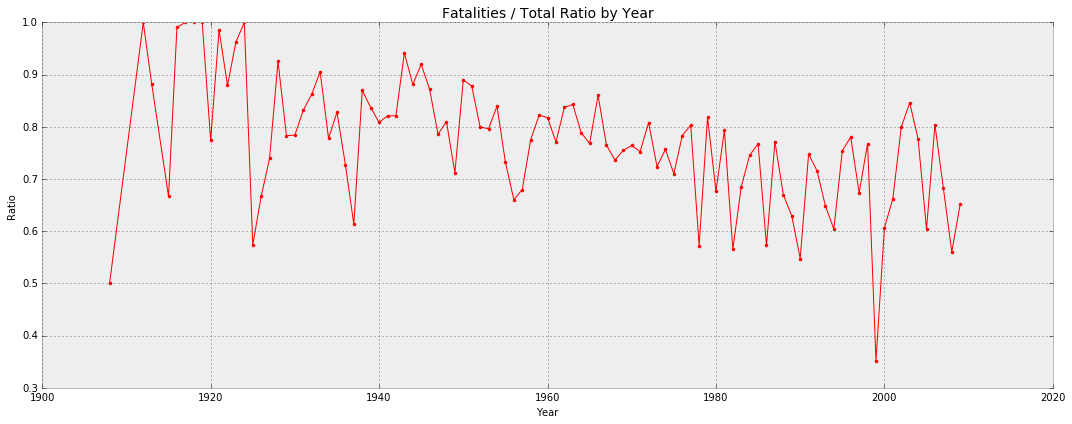

In [21]:
plt.figure(figsize=(15,6))
plt.plot(Fatalities.index, 'Proportion', data=Fatalities, marker = ".", color = 'red', linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Ratio', fontsize=10)
plt.title('Fatalities / Total Ratio by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

### Problems with misleading data
So previous plots may look scary - number of fatalities became so high (even so it's seems to trend to decrease after 90s). Guys on [reddit](https://www.reddit.com/r/dataisbeautiful/comments/86cba3/visualizing_airplane_crashes_19082009/) made a good point about the fact that graphs don't show the proportion of accidents by all flights by year. So 1970-1990 look like scary years in the history of airf lights with rise of deaths, but there might be also the rise of total amount of people flyong by air while actually proportion became lower.

I was googling the database of total number of flights or passengers and so far I could find just this dataset from [worldbank.org](https://data.worldbank.org/indicator/IS.AIR.DPRT?end=2016&start=1970&view=chart). So I have uploaded a .csv dataset from that site and let's see what we've got.

In [22]:
Totals = pd.read_csv('API_IS.AIR.DPRT_DS2_en_csv_v2_9948080.csv')
Totals.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
10,Antigua and Barbuda,ATG,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,26371.0,3.986500e+04,3.653360e+04,3.360604e+04,5.257200e+04,46404.00,40046.652,4.092768e+04,NaN,NaN
169,Namibia,NAM,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,5439.0,8.836000e+03,9.400000e+03,1.171100e+04,8.568000e+03,9197.00,10606.000,1.175900e+04,NaN,NaN
62,Europe & Central Asia (excluding high income),ECA,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,1031118.0,1.207345e+06,1.355187e+06,1.443326e+06,1.588207e+06,1721454.52,1826426.934,1.863516e+06,NaN,NaN
99,Hungary,HUN,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,45861.0,1.113070e+05,1.208262e+05,8.880183e+04,1.030800e+05,123708.00,145480.608,1.376050e+05,NaN,NaN
58,Algeria,DZA,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,52731.0,5.308800e+04,5.328600e+04,5.429200e+04,5.551600e+04,60066.00,65940.000,7.346574e+04,NaN,NaN


### Data Cleaning and Manipulation

In [23]:
Totals = Totals.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis = 1)
Totals = Totals.replace(np.nan, 0)
Totals = pd.DataFrame(Totals.sum())
Totals = Totals.drop(Totals.index[0:10])
Totals = Totals['1970':'2008']
Totals.columns = ['Sum']
Totals.index.name = 'Year'

In [24]:
Fatalities = Fatalities.reset_index()
Fatalities.Time = Fatalities.Time.apply(str)
Fatalities.index = Fatalities['Time']
del Fatalities['Time']
Fatalities = Fatalities['1970':'2008']
Fatalities = Fatalities[['Fatalities']]
Totals = pd.concat([Totals, Fatalities], axis=1) #joining two data frames into one
Totals['Ratio'] = Totals['Fatalities'] / Totals['Sum'] * 100 #calculating ratio

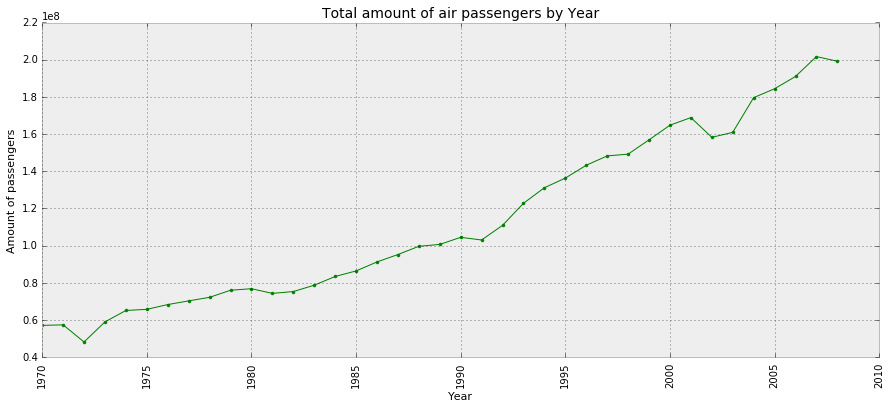

In [25]:
plt.figure(figsize=(15,6))
plt.plot(Totals.index, 'Sum', data=Totals, marker = ".", color = 'green', linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Amount of passengers', fontsize=11)
plt.title('Total amount of air passengers by Year', loc='Center', fontsize=14)
plt.xticks(rotation=90)
plt.show()

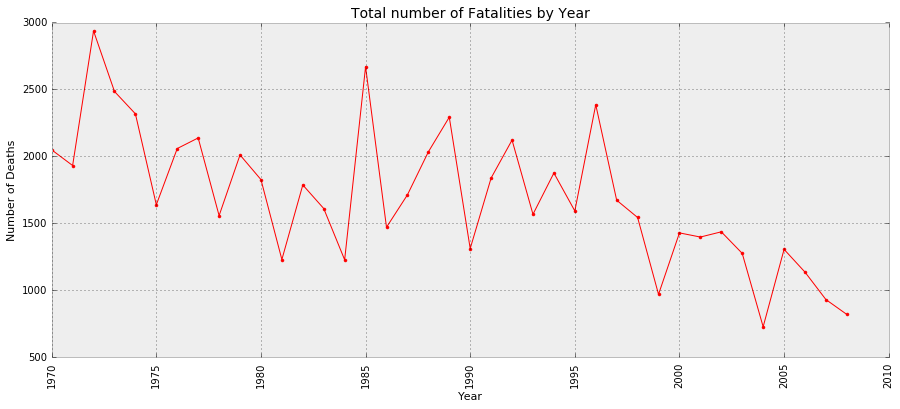

In [26]:
plt.figure(figsize=(15,6))
plt.plot(Fatalities.index, 'Fatalities', data=Fatalities, color='red', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Number of Deaths', fontsize=11)
plt.title('Total number of Fatalities by Year', loc='Center', fontsize=14)
plt.xticks(rotation=90)
plt.show()

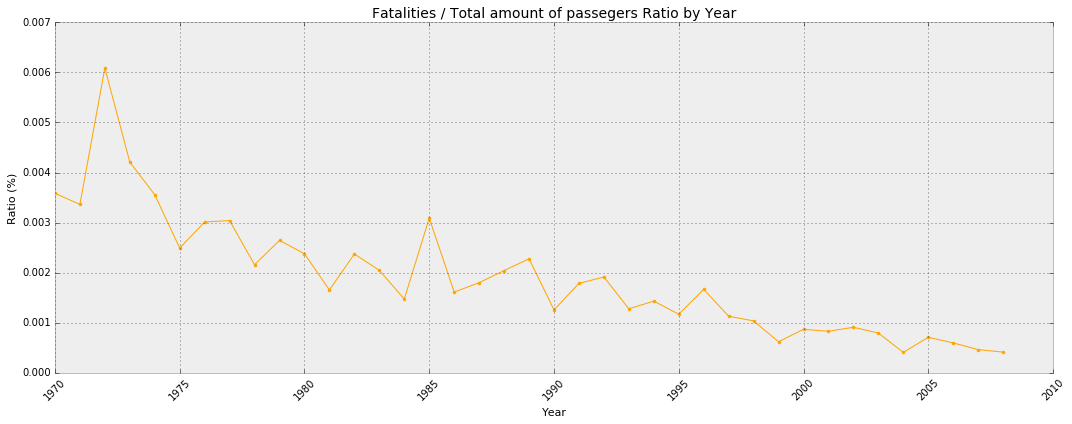

In [27]:
plt.figure(figsize=(15,6))
plt.plot(Totals.index, 'Ratio', data=Totals, color='orange', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Ratio (%)', fontsize=11)
plt.title('Fatalities / Total amount of passegers Ratio by Year', loc='Center', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From this plot we can see that trend actually goes down which was maybe not so obvious from plot with amount of deaths only. 
Let's put line with ratio and number of deaths on one plot.

In [28]:
fig =plt.figure(figsize=(12,6))
ax1 = fig.subplots()
ax1.plot(Totals.index, 'Ratio', data=Totals, color='orange', marker = ".", linewidth=1)
ax1.set_xlabel('Year', fontsize=11)
for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
ax1.set_ylabel('Ratio (%)', color='orange', fontsize=11)
ax1.tick_params('y', colors='orange')
ax2 = ax1.twinx()
ax2.plot(Fatalities.index, 'Fatalities', data=Fatalities, color='red', marker = ".", linewidth=1)
ax2.set_ylabel('Number of fatalities', color='red', fontsize=11)
ax2.tick_params('y', colors='r')
plt.title('Fatalities VS Ratio by Year', loc='Center', fontsize=14)
fig.tight_layout()
plt.show()

AttributeError: 'Figure' object has no attribute 'subplots'

We can see that peaks like 1985, 1989, 1992, 1996 look scary, while ratio actually trends down. Of course there are some questions thats are wanted to be asked, like "is it full database of airplane accidents?" or "does total number of passenger include military flights or just passenger?" so this plot is that an estimation.

### Operators Analysis

In [ ]:
Data.Operator = Data.Operator.str.upper()
Data.Operator = Data.Operator.replace('A B AEROTRANSPORT', 'AB AEROTRANSPORT')

Total_by_Op = Data.groupby('Operator')[['Operator']].count()
Total_by_Op = Total_by_Op.rename(columns={"Operator": "Count"})
Total_by_Op = Total_by_Op.sort_values(by='Count', ascending=False).head(15)



In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=Total_by_Op.index, x="Count", data=Total_by_Op)
plt.xlabel('Count', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Count by Opeartor', loc='Center', fontsize=14)
plt.show()

In [ ]:
Prop_by_Op = Data.groupby('Operator')[['Fatalities']].sum()
Prop_by_Op = Prop_by_Op.rename(columns={"Operator": "Fatalities"})
Prop_by_Op = Prop_by_Op.sort_values(by='Fatalities', ascending=False)
Prop_by_OpTOP = Prop_by_Op.head(15)


In [ ]:

plt.figure(figsize=(12,6))
sns.barplot(y=Prop_by_OpTOP.index, x="Fatalities", data=Prop_by_OpTOP, palette="gist_heat")
plt.xlabel('Fatalities', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Fatalities by Opeartor', loc='Center', fontsize=14)
plt.show()

Let's find out which Flight Operators actually have the least number of people involved:

In [ ]:
#Prop_by_Op[Prop_by_Op['Fatalities'] == Prop_by_Op.Fatalities.min()].index.tolist()

In [ ]:
Aeroflot = Data[Data.Operator == 'AEROFLOT']

Count_by_Year = Aeroflot.groupby(Data.Time.dt.year)[['Date']].count()
Count_by_Year = Count_by_Year.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.plot(Count_by_Year.index, 'Count', data=Count_by_Year, marker='.', color='red', linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Count of accidents by Year (Aeroflot)', loc='Center', fontsize=14)
plt.show()

It seems like 1970s were not the best year in history of Aeroflot. More about accidents in this years can be found on [Wikipedia page](https://en.wikipedia.org/wiki/Aeroflot_accidents_and_incidents_in_the_1970s)

### Conclusion

Even so the number of crashes and fatalities is increasing, the number of flights is also increasing. And we could actually see that the ratio of fatalities/total amount of passengers trending down (for 2000s). However we can not make decisions about any Operator like "which airline is much safer to flight with" without knowledge of total amount flights. If Aeroflot has the largest number of crashes this doesn't mean that it is not worse to flight with because it might have the largest amount of flights. 

So this project taught me to think more critical about data and not to make decisions without including athe infotmation possible.

I hope you enjoyed it :)